In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\torre\Desktop\IronHack\Labs\Week 5\Project\nbs-5-master-master\ironkaggle\sales.csv")
sales_data = pd.read_csv(r"C:\Users\torre\Desktop\IronHack\Labs\Week 5\Project\nbs-5-master-master\ironkaggle\sales.csv")

In [4]:
### Changing the date column into an int for the data modeling. 
sales_data = df.drop(columns=['Unnamed: 0'])
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')
sales_data['date'] = pd.to_datetime(sales_data['date']).dt.strftime('%Y%m%d').astype(int)
date_column = sales_data['date']

In [49]:
### Changing the state_holiday column into a binary array because of string issue
sales_data['state_holiday'] = sales_data['state_holiday'].astype('category')
sales_data = sales_data.drop_duplicates()
numeric_cols = ['nb_customers_on_day', 'sales']
for col in numeric_cols:
    sales_data = sales_data[sales_data[col] >= 0]
cleaned_sales_data['state_holiday'] = cleaned_sales_data['state_holiday'].astype(str)
cleaned_sales_data['state_holiday'] = cleaned_sales_data['state_holiday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)
cleaned_sales_data['state_holiday'] = cleaned_sales_data['state_holiday'].astype(int)

0    20130418
1    20150411
2    20130829
3    20130528
4    20131010
Name: date, dtype: int32

In [7]:
cleaned_sales_data = sales_data[sales_data['sales'] != 0]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sales_data_subset = pd.read_csv(
    r"C:\Users\torre\Desktop\IronHack\Labs\Week 5\Project\nbs-5-master-master\ironkaggle\sales.csv",
    nrows=50000
)

sales_data_subset['date'] = pd.to_datetime(sales_data_subset['date']).dt.strftime('%Y%m%d').astype(int)

sales_data_subset['state_holiday'] = sales_data_subset['state_holiday'].astype(str)

zero_sales_holidays = sales_data_subset[
    (sales_data_subset['sales'] == 0) &
    (sales_data_subset['state_holiday'].isin(['a', 'b', 'c']))
]

if not zero_sales_holidays.empty:
    print("Detected cases of zero sales on state holidays (a, b, c):")
    print(zero_sales_holidays)

sales_data_subset['state_holiday'] = sales_data_subset['state_holiday'].apply(
    lambda x: 1 if x in ['a', 'b', 'c'] else 0
).astype(int)

X = sales_data_subset.drop(columns=['sales'])
y = sales_data_subset['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R2: {r2}")

Detected cases of zero sales on state holidays (a, b, c):
       Unnamed: 0  store_ID  day_of_week      date  nb_customers_on_day  open  \
113        654516       836            5  20150501                    0     0   
128        350557       552            1  20130520                    0     0   
155         27878       803            5  20141003                    0     0   
160        610321       570            4  20140501                    0     0   
224         54216       313            2  20130101                    0     0   
...           ...       ...          ...       ...                  ...   ...   
49878      118256      1096            5  20131101                    0     0   
49929      631942       717            5  20141226                    0     0   
49945      396785       185            5  20150501                    0     0   
49967      642731       881            5  20141003                    0     0   
49995      307434       757            4  20150514 

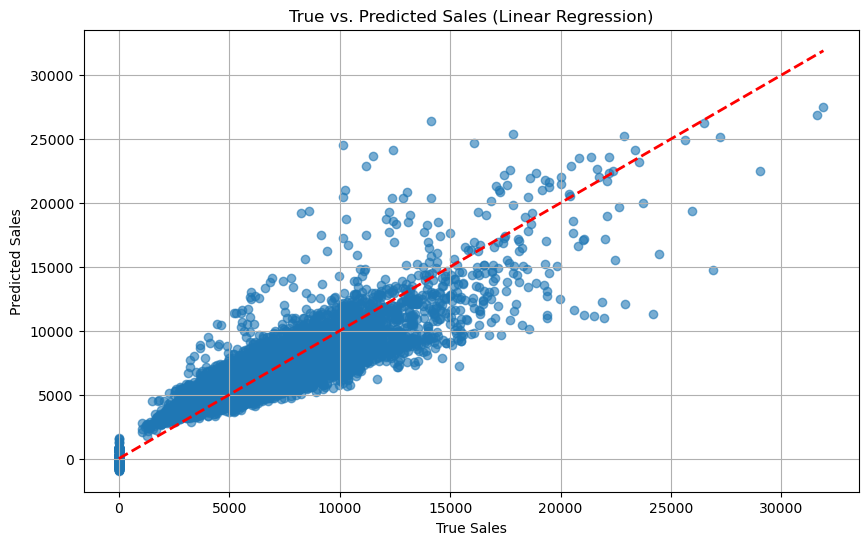

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('True vs. Predicted Sales (Linear Regression)')
plt.grid(True)
plt.show()